In [200]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import math

# PCA-Penguins-Data

In [201]:
df = pd.read_csv('penguins.csv')

In [202]:
#Convert string values to categorical numeric values

df['sex'] = [1 if itm == "MALE" else 0 for itm in df['sex']]

In [203]:
#Check for empty rows

df.isna().sum()

culmen_length_mm     2
culmen_depth_mm      2
flipper_length_mm    2
body_mass_g          2
sex                  0
dtype: int64

In [204]:
#Handling missing values by substituting it's respective mean/mode values of it's respective
#feature

df['culmen_length_mm'] = df['culmen_length_mm'].fillna(df['culmen_length_mm'].mean())
df['culmen_depth_mm'] = df['culmen_depth_mm'].fillna(df['culmen_depth_mm'].mean())
df['flipper_length_mm'] = df['flipper_length_mm'].fillna(df['flipper_length_mm'].mean())
df['body_mass_g'] = df['body_mass_g'].fillna(df['body_mass_g'].mean())
df['sex'] = df['sex'].fillna(df['sex'].mode())

In [205]:
#Check for empty rows

df.isna().sum()

culmen_length_mm     0
culmen_depth_mm      0
flipper_length_mm    0
body_mass_g          0
sex                  0
dtype: int64

In [206]:
#Initialise the training dataset

x = df

In [207]:
#Normalise the data

x = StandardScaler().fit_transform(x)

In [208]:
x

array([[-0.88708123,  0.78774251, -0.12726349, -0.56578921,  1.01759666],
       [-0.81349399,  0.12655633, -0.10798968, -0.50316788, -0.98270763],
       [-0.66631952,  0.43171918, -0.07329683, -1.19200251, -0.98270763],
       ...,
       [ 1.1917582 , -0.73807176,  0.03078174,  1.93906399,  1.01759666],
       [ 0.23512413, -1.19581604, -0.00776588,  1.25022936, -0.98270763],
       [ 1.09977416, -0.53462985, -0.00391112,  1.50071468,  1.01759666]])

In [209]:
#Apply PCA with 2 components/dimesnsions. Please refer to this amazing paper
#which helped me understand PCA a lot better (https://www.stat.cmu.edu/~cshalizi/uADA/12/lectures/ch18.pdf)

from sklearn.decomposition import PCA

pca = PCA(n_components=2)

principalComponents = pca.fit_transform(x)

principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])

In [210]:
principalDf

,principal component 1,principal component 2
0,-0.764970,1.232792
1,-1.210186,-0.566731
2,-1.663680,-0.278878
3,-0.359752,-0.649823
4,-2.092099,0.153285
...,...,...
339,-0.359752,-0.649823
340,0.923381,-1.743623
341,2.563064,0.031589
342,0.957619,-1.608043


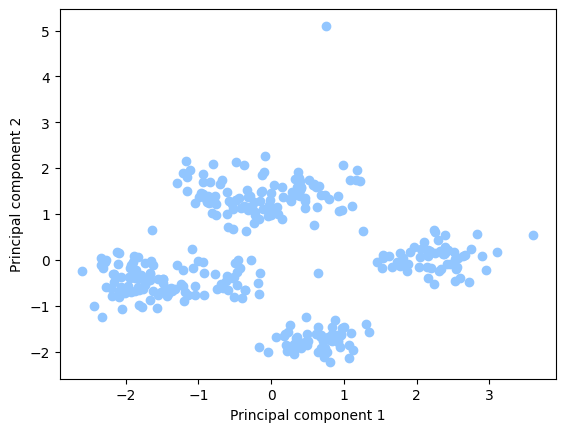

In [211]:
#Visualise the training data

plt.scatter(principalDf['principal component 1'], principalDf['principal component 2'])
plt.xlabel('Principal component 1')
plt.ylabel('Principal component 2')
plt.style.use('seaborn-v0_8-pastel')

In [212]:
#Function to calculate the euclidian distance between two (x, y) points

def euclidian_distance(a, b):
    dist = (((a - b)**2).sum(axis=2))**0.5
    return dist

In [213]:
#Function to calculate the mean/average of n (x, y) data points

def avg(a):
    avg = (a.sum(axis=0))/len(a)
    return avg

In [214]:
#Vectorized implementation of k-means algorithm

def k_means():
    X_C = [] #List to hold index of cluster, which X is closest to
    cost = [] #List to store cost values across iterations
    X = np.array(principalDf) #Training data
    C = np.array([X[np.random.randint(0, len(X))] for rnd in range(0, 4)]) #Random 4 data points from X that act as initial cluster centroids
    C_res = C.reshape([4, 1, 2]) #Reshaping to make matrix multiplicatoin efficient
    itr_proc = True
    while True:
        dist = euclidian_distance(X, C_res) #Here we calculate the euclidian distance 
        X_C = dist.T.argmin(axis=1) #Assign the cluster index which is the minimum (shortest disatnce between a cluster centroid C and X)
        cost.append(dist.T.min(axis=1).sum()) #Sum over to find the cost
        for indices in range(0, len(C)):
            C[indices] = avg(X[np.where(X_C == indices)[0], :]) #Average of points which are closest each of the cluster centroids
            C_res = C.reshape([4, 1, 2]) #Reshaping to make matrix multiplicatoin efficient
        if len(cost) > 1:
            if cost[-1] - cost[-2] == 0:
                break
    return [C, X_C, X, cost]

In [218]:
results = k_means()

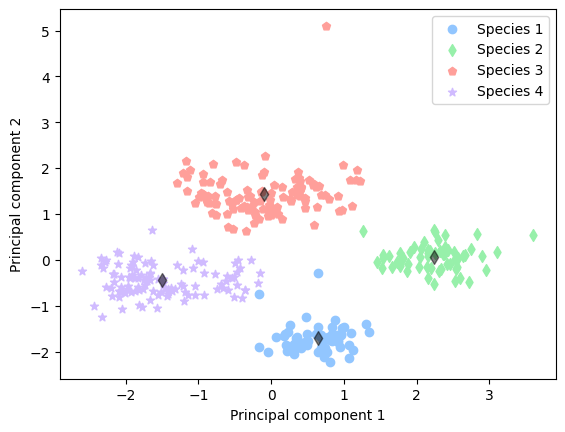

In [219]:
for i in range(0, 4):
    if i == 0:
        plt.scatter(results[2][np.where(results[1] == i)][:, 0], results[2][np.where(results[1] == i)][:, 1])
    if i == 1:
        plt.scatter(results[2][np.where(results[1] == i)][:, 0], results[2][np.where(results[1] == i)][:, 1], marker='d')
    if i == 2:
        plt.scatter(results[2][np.where(results[1] == i)][:, 0], results[2][np.where(results[1] == i)][:, 1], marker='p')
    if i == 3:
        plt.scatter(results[2][np.where(results[1] == i)][:, 0], results[2][np.where(results[1] == i)][:, 1], marker='*')
    plt.legend(['Species 1', 'Species 2', 'Species 3', 'Species 4', 'Cluster centroids'])
    plt.xlabel('Principal component 1')
    plt.ylabel('Principal component 2')
    plt.style.use('seaborn-v0_8-pastel')

plt.scatter(results[0][:, 0], results[0][:, 1], color='black', s=50, marker='d', alpha=0.5)

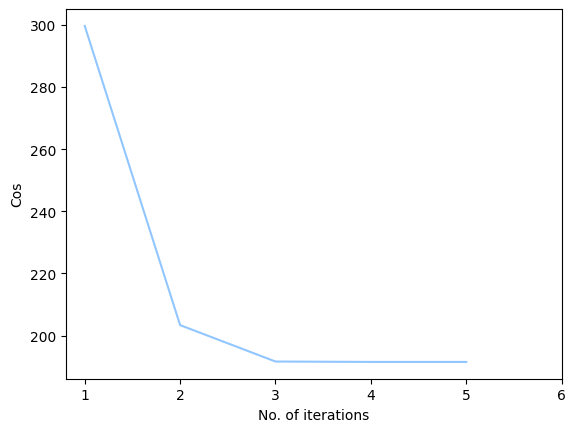

In [246]:
plt.plot([x for x in range(1, len(results[3])+1)], results[3])
plt.xlabel('No. of iterations')
plt.ylabel('Cos')
plt.xticks([1, 2, 3, 4, 5, 6])
plt.style.use('seaborn-v0_8-pastel')